In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy

In [146]:

data = pd.read_csv('국민건강보험공단_건강검진정보_20211231.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999917 non-null   float64
 8   SIGHT_LEFT         999789 non-null   float64
 9   SIGHT_RIGHT        999790 non-null   float64
 10  HEAR_LEFT          999810 non-null   float64
 11  HEAR_RIGHT         999811 non-null   float64
 12  BP_HIGH            992655 non-null   float64
 13  BP_LWST            992655 non-null   float64
 14  BLDS               992588 non-null   float64
 15  TOT_CHOLE          425059 non-nul

In [147]:
data['SMK_STAT_TYPE_CD'].value_counts()

SMK_STAT_TYPE_CD
1.0    634160
2.0    182981
3.0    182489
Name: count, dtype: int64

In [148]:
#흡연자 그룹화
data['SMK_STAT_TYPE_CD'] = data['SMK_STAT_TYPE_CD'].replace({1: 0, 2: 0, 3: 1})

print(data['SMK_STAT_TYPE_CD'].value_counts())

SMK_STAT_TYPE_CD
0.0    817141
1.0    182489
Name: count, dtype: int64


# 콜레스테롤 관련 지표 분석

확인할 수 있는 콜레스테롤 지표 : TOT_CHOLE(총 콜레스테롤), HDL_CHOLE(HDL 콜레스테롤), LDL_CHOLE(LDL 콜레스테롤)

### 주의점

1. 콜레스테롤 정상치 140~200mg/dL
2. HDL_CHOLE의 경우 나쁜 콜레스테롤 없애는 긍정적인 성분, 정상치 : 30~65mg/dL
3. LDL_CHOLE의 경우 동맥경화나 질병을 야기하는 성분, 170md/dL 이상일 때 고LDL혈증으로 본다.

In [149]:
select_category=['TOT_CHOLE', 'HDL_CHOLE','LDL_CHOLE','SMK_STAT_TYPE_CD']
analysis_data = data[select_category]
print(analysis_data.describe(()))

           TOT_CHOLE      HDL_CHOLE      LDL_CHOLE  SMK_STAT_TYPE_CD
count  425059.000000  425055.000000  417432.000000     999630.000000
mean      198.747915      57.039856     116.261449          0.182557
std        43.769043      16.686704      39.384127          0.386303
min        44.000000       1.000000       1.000000          0.000000
50%       198.000000      55.000000     115.000000          0.000000
max      2625.000000     909.000000    2584.000000          1.000000


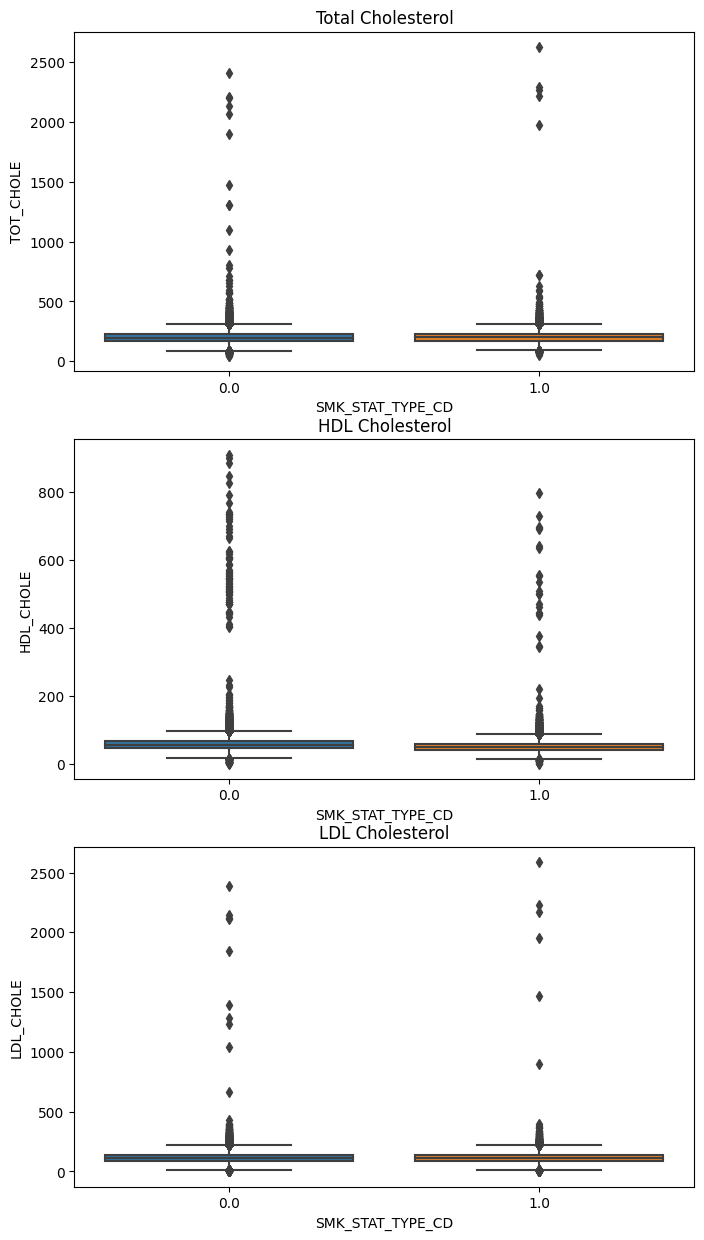

In [150]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

### 콜레스테롤 수치 판단

총 콜레스테롤 수치 간 판단치 : 200mg/dL

### 지질단백질 리파아제 결핍 및 아포지질단백질 CII 결핍

지질단백질 리파아제 결핍 및 아포지질단백질 CII 결핍은 트리글리세리드 포함 입자를 제거하는 데 필요한 특정 단백질이 결여되어 발생하는 드문 장애입니다. 이 장애가 있는 경우, 신체에서 혈류로부터 킬로미크론이 제거되지 않아 트리글리세리드 수치가 매우 높아질 수 있습니다. 치료가 수반되지 않는다면 수치는 종종 1,000mg/dL(11 mmol/L)보다 상당히 더 높게 됩니다.

### 결론

콜레스테롤 수치 1000mg/dL인 경우 장애 요소로 판단 가능하여 1000mg/DL을 넘어가는 수치는 제거

> [https://www.msdmanuals.com/ko-kr/홈/호르몬-및-대사-장애/콜레스테롤-장애/이상지질혈증](https://www.msdmanuals.com/ko-kr/%ED%99%88/%ED%98%B8%EB%A5%B4%EB%AA%AC-%EB%B0%8F-%EB%8C%80%EC%82%AC-%EC%9E%A5%EC%95%A0/%EC%BD%9C%EB%A0%88%EC%8A%A4%ED%85%8C%EB%A1%A4-%EC%9E%A5%EC%95%A0/%EC%9D%B4%EC%83%81%EC%A7%80%EC%A7%88%ED%98%88%EC%A6%9D)
>

In [151]:
analysis_data = analysis_data.dropna(subset=['TOT_CHOLE','LDL_CHOLE','HDL_CHOLE'])

In [152]:
analysis_data = analysis_data[(analysis_data['TOT_CHOLE'] <= 1000) & (analysis_data['LDL_CHOLE'] <= 1000)]
analysis_data = analysis_data.dropna()
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417244 entries, 574465 to 999999
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   TOT_CHOLE         417244 non-null  float64
 1   HDL_CHOLE         417244 non-null  float64
 2   LDL_CHOLE         417244 non-null  float64
 3   SMK_STAT_TYPE_CD  417244 non-null  float64
dtypes: float64(4)
memory usage: 15.9 MB


In [153]:
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['TOT_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['TOT_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['HDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['HDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['LDL_CHOLE'].count())
print(analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['LDL_CHOLE'].count())

345540
71704
345540
71704
345540
71704


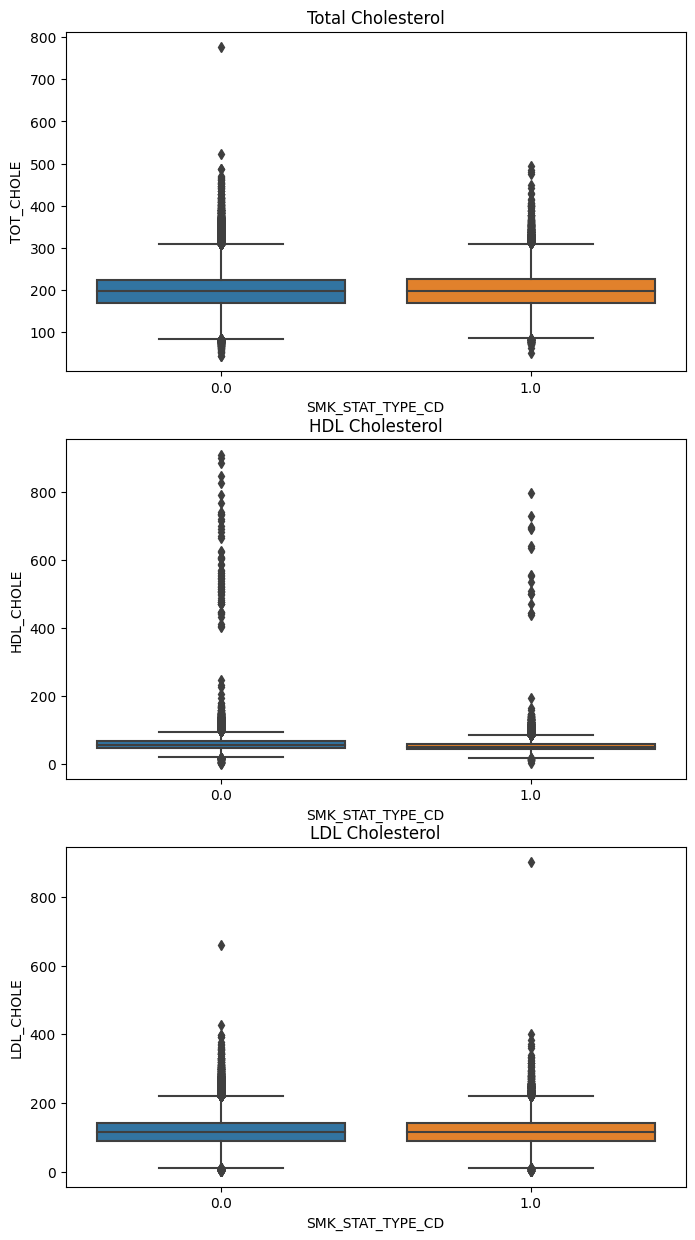

In [154]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='TOT_CHOLE', ax=axes[0])
axes[0].set_title('Total Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='HDL_CHOLE', ax=axes[1])
axes[1].set_title('HDL Cholesterol')

sns.boxplot(data=analysis_data, x='SMK_STAT_TYPE_CD', y='LDL_CHOLE', ax=axes[2])
axes[2].set_title('LDL Cholesterol')

plt.show()

In [155]:
non_smoking_group_TOT_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['TOT_CHOLE'].sample(n=20000, random_state=10)
smoking_group_TOT_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['TOT_CHOLE'].sample(n=20000, random_state=10)
non_smoking_group_HDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['HDL_CHOLE'].sample(n=20000, random_state=10)
smoking_group_HDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['HDL_CHOLE'].sample(n=20000, random_state=10)
non_smoking_group_LDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==0]['LDL_CHOLE'].sample(n=20000, random_state=10)
smoking_group_LDL_CHOLE = analysis_data[analysis_data['SMK_STAT_TYPE_CD']==1]['LDL_CHOLE'].sample(n=20000, random_state=10)

### 흡연자, 비흡연자 Total Cholesterol 비교

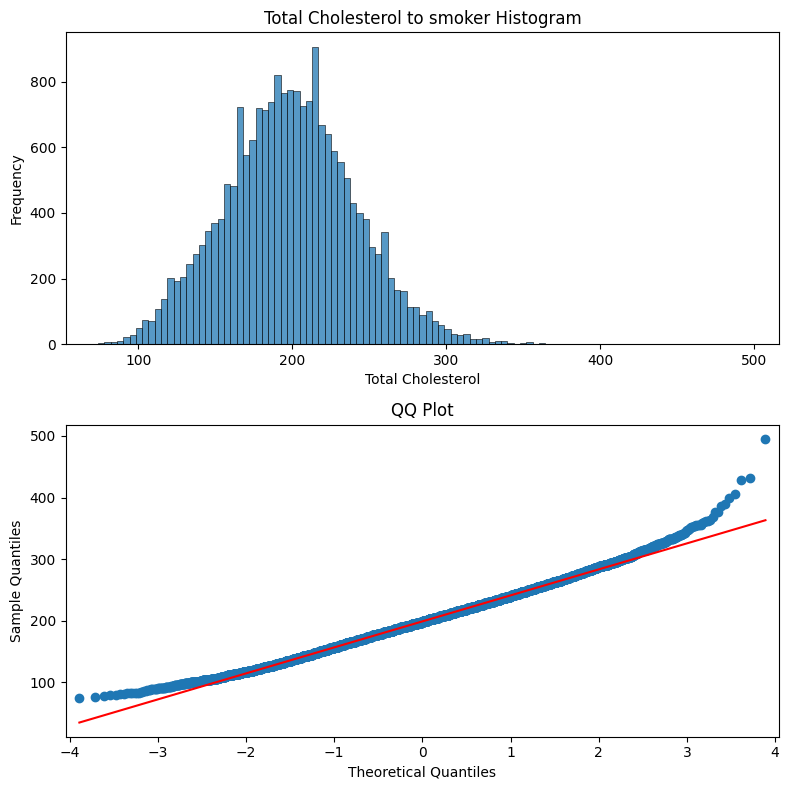

In [156]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_TOT_CHOLE,ax=ax1)
ax1.set_xlabel('Total Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('Total Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_TOT_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

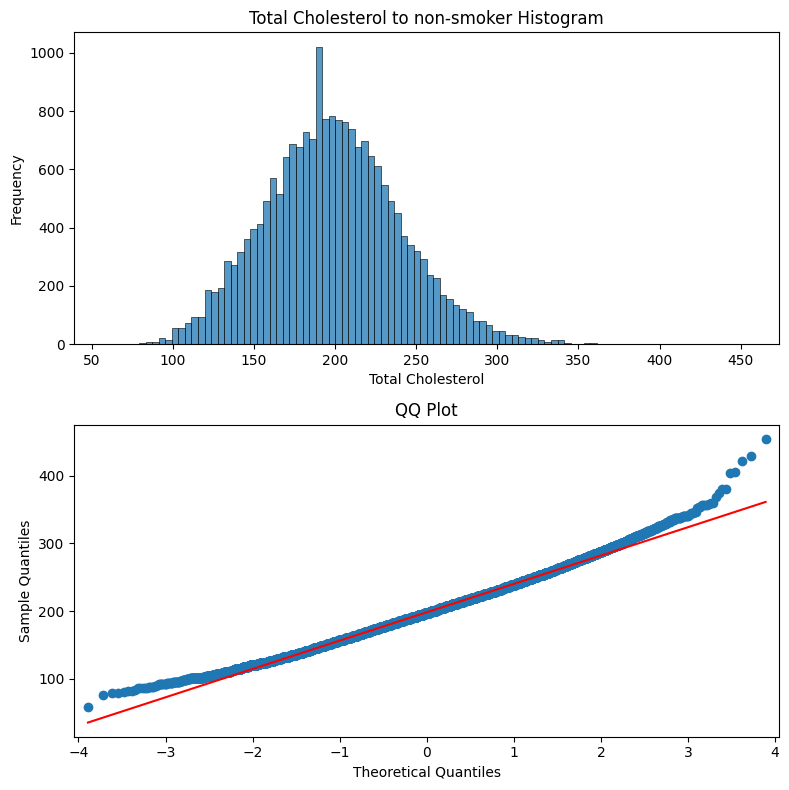

In [157]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_TOT_CHOLE,ax=ax1)
ax1.set_xlabel('Total Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('Total Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_TOT_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [158]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_TOT_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_TOT_CHOLE))

#표본크기 > 5000 이기에 KS-검정 진행
print('\nKS test')
print(scipy.stats.kstest(smoking_group_TOT_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_TOT_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_TOT_CHOLE, non_smoking_group_TOT_CHOLE))
#두 그룹 Equal variance 따른다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_TOT_CHOLE, non_smoking_group_TOT_CHOLE))

shapiro test
ShapiroResult(statistic=0.9964345693588257, pvalue=2.07381732436895e-21)
ShapiroResult(statistic=0.9950352907180786, pvalue=2.56606345188047e-25)

KS test
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=74.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=59.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=1.6188810224935046, pvalue=0.20325528012323252)

Rank sum test
RanksumsResult(statistic=1.5743235724910483, pvalue=0.1154126628058855)


/opt/homebrew/anaconda3/envs/sda2023/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### 흡연자, 비흡연자 HDL Cholesterol 비교

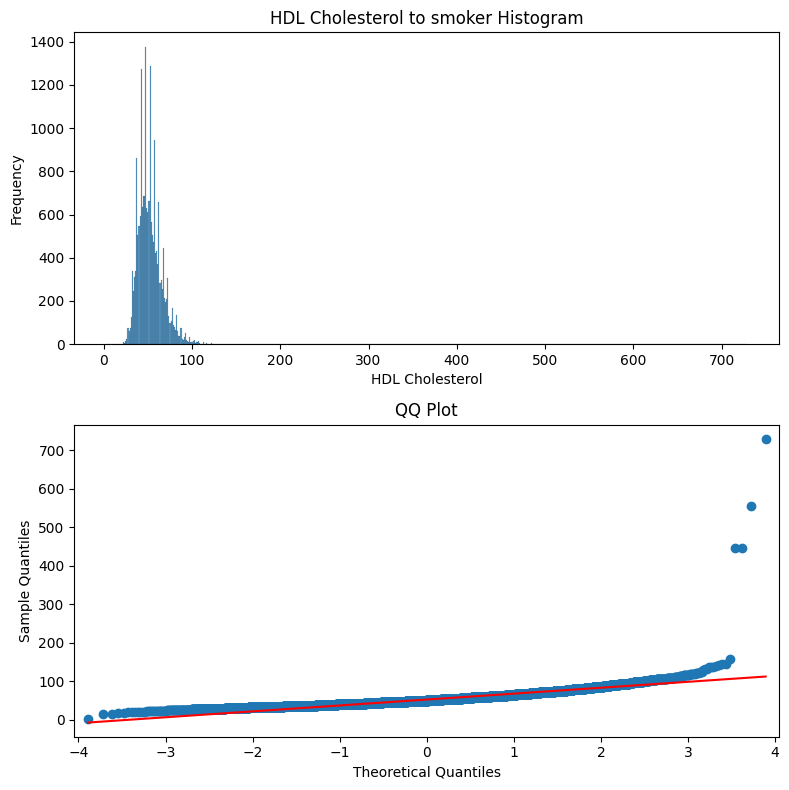

In [159]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_HDL_CHOLE,ax=ax1)
ax1.set_xlabel('HDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('HDL Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_HDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

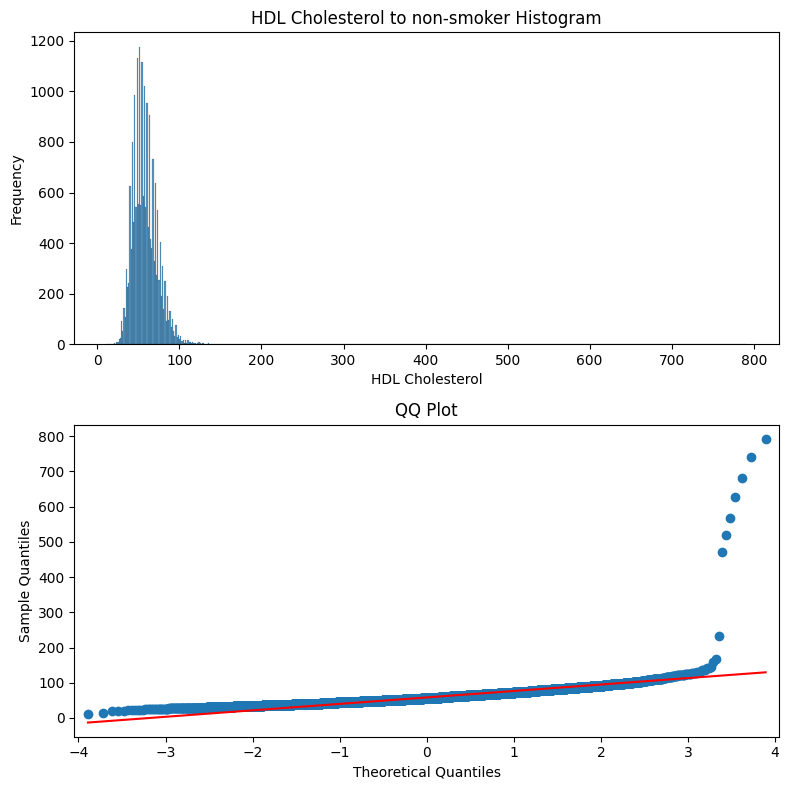

In [160]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_HDL_CHOLE,ax=ax1)
ax1.set_xlabel('HDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('HDL Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_HDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [161]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_HDL_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_HDL_CHOLE))

#표본크기 > 5000 이기에 KS-검정 진행
print('\nKS test')
print(scipy.stats.kstest(smoking_group_HDL_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_HDL_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_HDL_CHOLE, non_smoking_group_HDL_CHOLE))
#두 그룹 Equal variance 따르지 않는다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_HDL_CHOLE, non_smoking_group_HDL_CHOLE))



shapiro test
ShapiroResult(statistic=0.7822005152702332, pvalue=0.0)
ShapiroResult(statistic=0.6877695322036743, pvalue=0.0)

KS test
KstestResult(statistic=0.99995, pvalue=0.0, statistic_location=14.0, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=11.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=100.89094536954832, pvalue=1.0369301339143829e-23)

Rank sum test
RanksumsResult(statistic=-41.019481124492145, pvalue=0.0)


/opt/homebrew/anaconda3/envs/sda2023/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


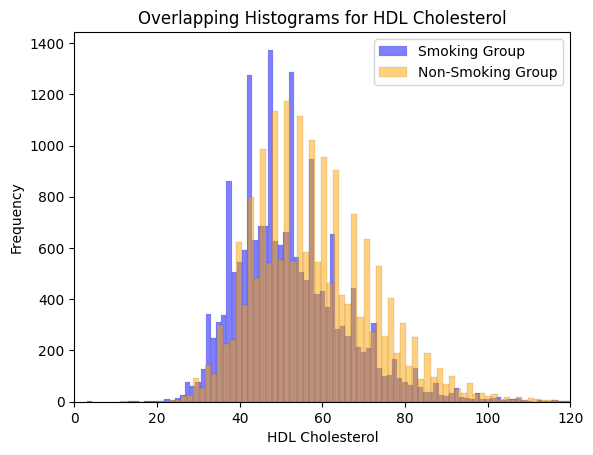

In [162]:
fig, ax = plt.subplots()
sns.histplot(smoking_group_HDL_CHOLE, ax=ax, label='Smoking Group', color='blue', alpha=0.5)
sns.histplot(non_smoking_group_HDL_CHOLE, ax=ax, label='Non-Smoking Group', color='orange', alpha=0.5)
ax.set_xlim(0, 120)
ax.set_xlabel('HDL Cholesterol')
ax.set_ylabel('Frequency')
ax.set_title('Overlapping Histograms for HDL Cholesterol')
ax.legend()
plt.show()

### 흡연자, 비흡연자 LDL Cholesterol 비교

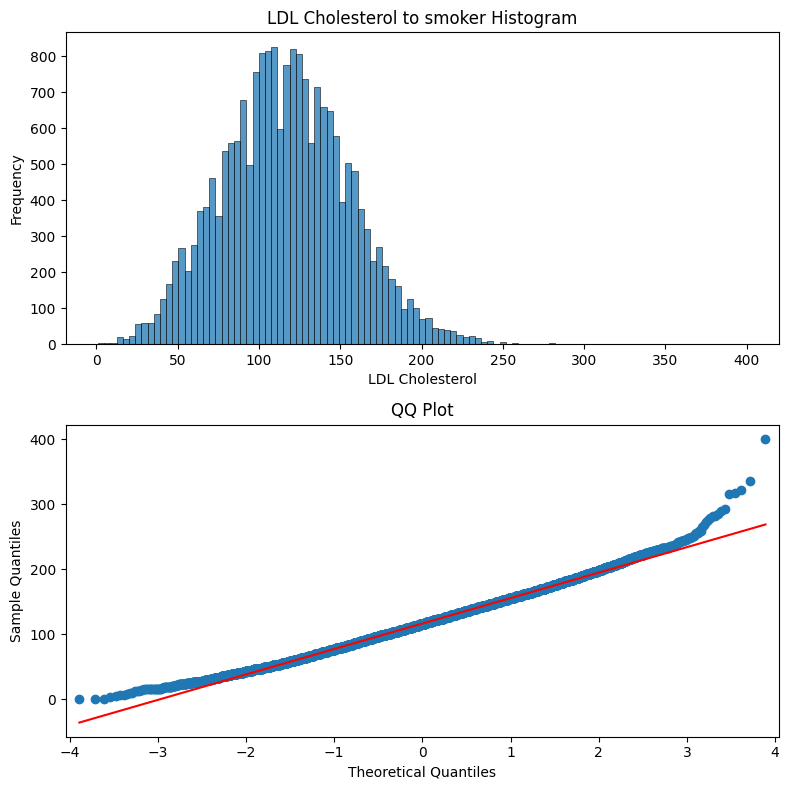

In [163]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(smoking_group_LDL_CHOLE,ax=ax1)
ax1.set_xlabel('LDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('LDL Cholesterol to smoker Histogram')

sm.qqplot(smoking_group_LDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

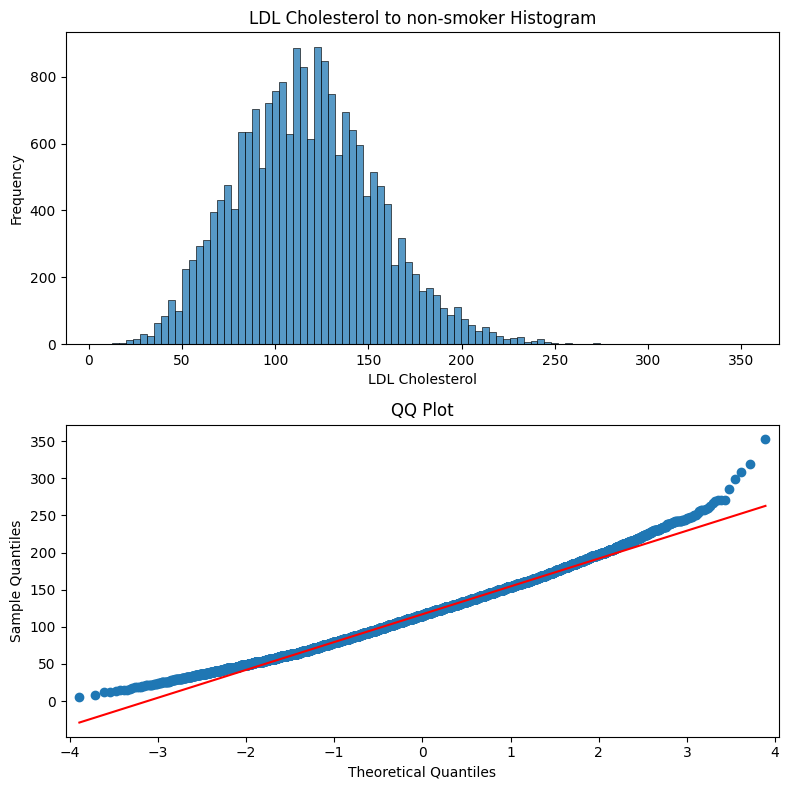

In [164]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

sns.histplot(non_smoking_group_LDL_CHOLE,ax=ax1)
ax1.set_xlabel('LDL Cholesterol')
ax1.set_ylabel('Frequency')
ax1.set_title('LDL Cholesterol to non-smoker Histogram')

sm.qqplot(non_smoking_group_LDL_CHOLE, line='s', ax=ax2)
ax2.set_title('QQ Plot')

plt.tight_layout()

plt.show()

In [165]:
# normality test
print('shapiro test')
print(scipy.stats.shapiro(smoking_group_LDL_CHOLE))
print(scipy.stats.shapiro(non_smoking_group_LDL_CHOLE))

#표본크기 > 5000 이기에 KS-검정 진행
print('\nKS test')
print(scipy.stats.kstest(smoking_group_LDL_CHOLE, 'norm'))
print(scipy.stats.kstest(non_smoking_group_LDL_CHOLE, 'norm'))

#정규성을 따르지않는다는걸 확인할 수 있다.

#Eqaul Variance test
print('\nEqual variance - levene test')
print(scipy.stats.levene(smoking_group_LDL_CHOLE, non_smoking_group_LDL_CHOLE))
#두 그룹 Equal variance 따르지 않는다.

print('\nRank sum test')
print(scipy.stats.ranksums(smoking_group_LDL_CHOLE, non_smoking_group_LDL_CHOLE))




shapiro test
ShapiroResult(statistic=0.9960110783576965, pvalue=1.0745913738018557e-22)
ShapiroResult(statistic=0.9936023354530334, pvalue=1.5127805360528797e-28)

KS test
KstestResult(statistic=0.9998183287581669, pvalue=0.0, statistic_location=4.0, statistic_sign=-1)
KstestResult(statistic=0.9999997133484281, pvalue=0.0, statistic_location=5.0, statistic_sign=-1)

Equal variance - levene test
LeveneResult(statistic=31.5592211388436, pvalue=1.9473276726293215e-08)

Rank sum test
RanksumsResult(statistic=-0.8001329526048413, pvalue=0.4236337707703566)


/opt/homebrew/anaconda3/envs/sda2023/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


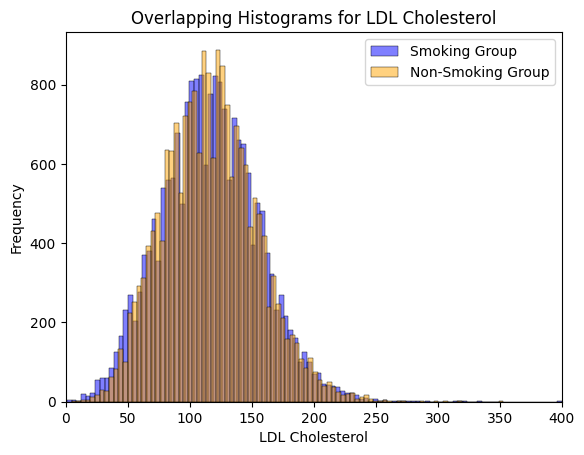

In [170]:
fig, ax = plt.subplots()
sns.histplot(smoking_group_LDL_CHOLE, ax=ax, label='Smoking Group', color='blue', alpha=0.5)
sns.histplot(non_smoking_group_LDL_CHOLE, ax=ax, label='Non-Smoking Group', color='orange', alpha=0.5)
ax.set_xlim(0, 400)
ax.set_xlabel('LDL Cholesterol')
ax.set_ylabel('Frequency')
ax.set_title('Overlapping Histograms for LDL Cholesterol')
ax.legend()
plt.show()

In [166]:
correlation_tot_chole = analysis_data['TOT_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])
correlation_hdl_chole = analysis_data['HDL_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])
correlation_ldl_chole = analysis_data['LDL_CHOLE'].corr(analysis_data['SMK_STAT_TYPE_CD'])

print(f'Correlation between TOT_CHOLE and SMK_STAT_TYPE_CD: {correlation_tot_chole}')
print(f'Correlation between HDL_CHOLE and SMK_STAT_TYPE_CD: {correlation_hdl_chole}')
print(f'Correlation between LDL_CHOLE and SMK_STAT_TYPE_CD: {correlation_ldl_chole}')

Correlation between TOT_CHOLE and SMK_STAT_TYPE_CD: 0.007085777076338817
Correlation between HDL_CHOLE and SMK_STAT_TYPE_CD: -0.12366384577489248
Correlation between LDL_CHOLE and SMK_STAT_TYPE_CD: -0.003286933487654091


In [167]:
# 회귀분석을 위한 데이터프레임 생성
X = analysis_data[['TOT_CHOLE', 'HDL_CHOLE', 'LDL_CHOLE']]
X = sm.add_constant(X)  # 상수항 추가
y = analysis_data['SMK_STAT_TYPE_CD']

# 회귀모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       SMK_STAT_TYPE_CD   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3946.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        00:19:22   Log-Likelihood:            -1.7946e+05
No. Observations:              417244   AIC:                         3.589e+05
Df Residuals:                  417240   BIC:                         3.590e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1679      0.003     48.192      0.0